# MCBDD Module I, Task 2
Please share a piece of code that visualizes the probability that Fred is indeed infected as the dependent variable, with the infection prevalence (5% in the example above, which takes any real-number value between 0.001% to 50%) and the specificity (99% in the example above, which takes values 99%, 99.9%,99.99%, and 99.999%) as independent variables. For simplicity, we fix the sensitivity at 99%. Visualize the results if possible, and use integers to check and explain your results.

$P(i|p) = \frac{P(p|i) \times P(i)}{P(p|i) \times P(i) + P(p|h) \times P(h)}
= \frac{sensitivity \times prevalence}{sensitivity \times prevalence + (1 - specificity) \times (1 - prevalence)}, with:$

$sensitivity = P(p|i)$

$specificity = P(n|h) = 1 - P(p|h)$

In [41]:
def p_infected(prevalence, sensitivity, specificity):
    return sensitivity * prevalence / (sensitivity * prevalence + (1 - specificity) * (1 - prevalence))

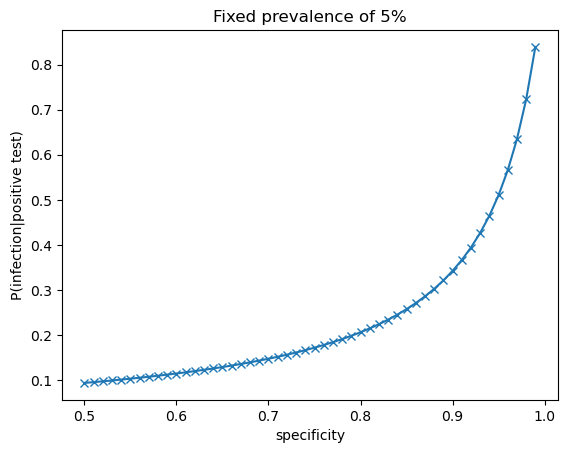

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# fix prevalence at 5%
specificity = np.arange(0.5,1,0.01) #np.array([0.99,0.999,0.9999,0.99999])
plt.plot(specificity, p_infected(0.05, 0.99, specificity),'x-')
plt.xlabel("specificity")
plt.ylabel("P(infection|positive test)")
plt.title("Fixed prevalence of 5%")
plt.show()

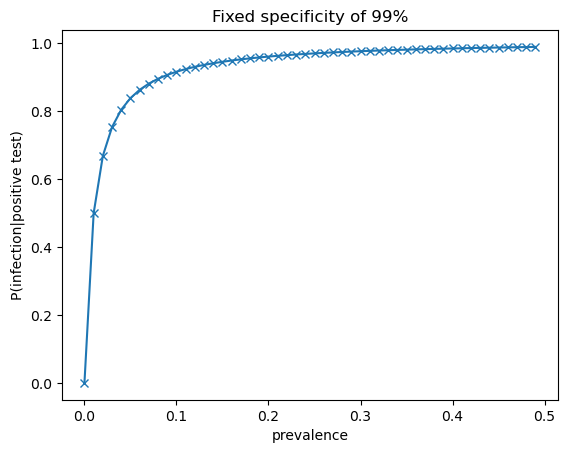

In [43]:
# fix specificity at 99%
prevalence = np.arange(0.00001,0.5,0.01)
plt.plot(prevalence, p_infected(prevalence, 0.99, 0.99),'x-')
plt.xlabel("prevalence")
plt.ylabel("P(infection|positive test)")
plt.title("Fixed specificity of 99%")
plt.show()

In [40]:
# TODO plot both in one